<a href="https://colab.research.google.com/github/sandhiya176/EBPL/blob/main/my_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

STEP 1: Organize Dataset Like This

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("xiaopengzhang12/lung-cancer-mri-images")

print("Path to dataset files:", path)

100%|██████████| 522M/522M [00:14<00:00, 37.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xiaopengzhang12/lung-cancer-mri-images/versions/1


STEP 2: Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEP 3: Image Data Generator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

zip_path = '/content/drive/MyDrive/archive.zip'
extracted_path = '/content/lung_cancer_images_extracted' # A temporary directory to extract to

# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

# Extract the zip file
if os.path.exists(zip_path):
    print(f"Extracting '{zip_path}' to '{extracted_path}'...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Extraction complete.")
else:
    print(f"Error: Zip file not found at '{zip_path}'. Please ensure the file is in your Google Drive.")

# Now flow from the extracted directory
train_data = datagen.flow_from_directory(
    extracted_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    extracted_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Extracting '/content/drive/MyDrive/archive.zip' to '/content/lung_cancer_images_extracted'...
Extraction complete.
Found 2944 images belonging to 1 classes.
Found 736 images belonging to 1 classes.


STEP 4: Build CNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

STEP 5: Train Model

In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9845 - loss: 0.0357 - val_accuracy: 1.0000 - val_loss: 9.7293e-37
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 1.0000 - loss: 1.2386e-25 - val_accuracy: 1.0000 - val_loss: 9.5926e-37
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 1.0000 - loss: 1.5887e-27 - val_accuracy: 1.0000 - val_loss: 9.5926e-37
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 1.0000 - loss: 2.8897e-28 - val_accuracy: 1.0000 - val_loss: 9.5931e-37
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 1.0000 - loss: 1.4570e-25 - val_accuracy: 1.0000 - val_loss: 9.5936e-37
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 1.0000 - loss: 1.2943e-24 - val_accuracy: 1.0000 - val_loss: 9.5940e-37
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 1.0000 - loss: 1.5146e-26 - val_accuracy: 1.0000 - val_loss: 9.5928e-37
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accura

STEP 6: Evaluate Model

In [7]:
loss, accuracy = model.evaluate(val_data)
print("Validation Accuracy:", accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 1.0000 - loss: 1.7751e-36
Validation Accuracy: 1.0


Dataset Visualization (Images Preview)
🔹 Show Sample Images

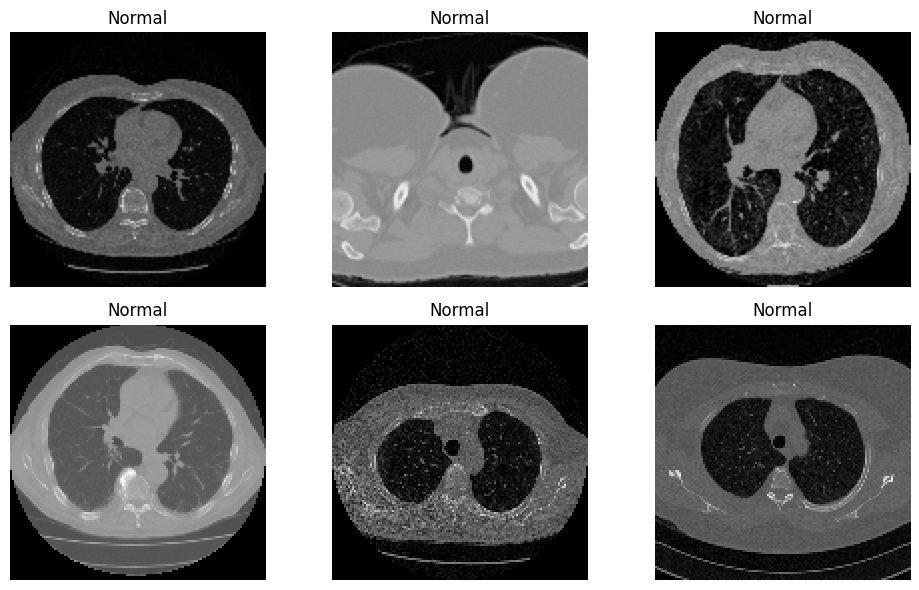

In [8]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title("Cancer" if labels[i]==1 else "Normal")


    plt.axis("off")

plt.tight_layout()
plt.show()

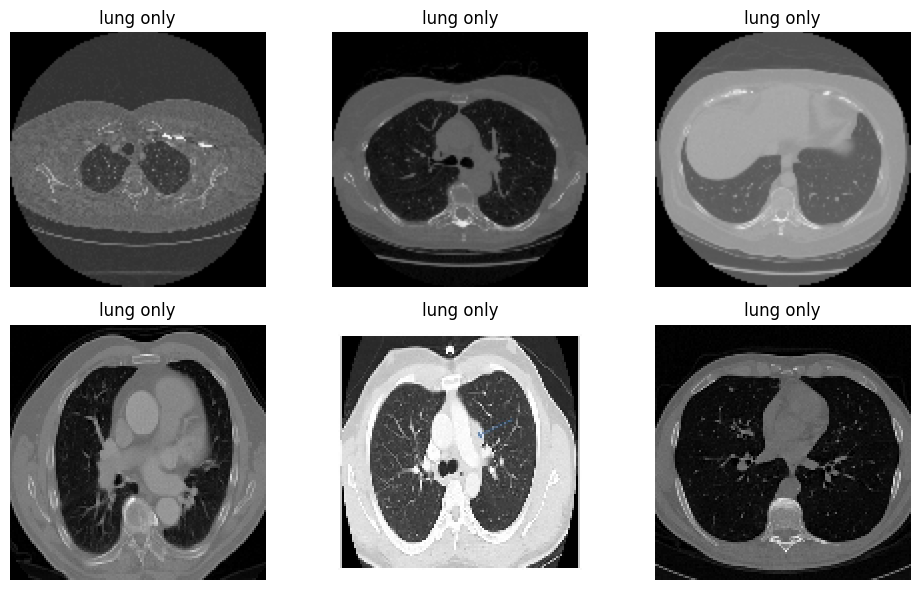

In [24]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])

    plt.title("Cancer" if labels[i]==1 else "lung only")

    plt.axis("off")

plt.tight_layout()
plt.show()

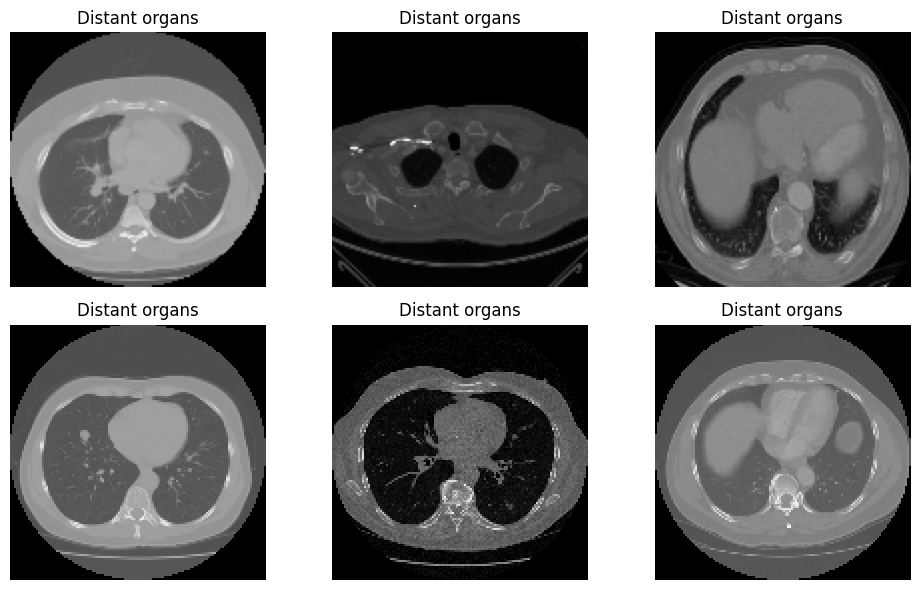

In [26]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])

    plt.title("Cancer" if labels[i]==1 else "Distant organs")

    plt.axis("off")

plt.tight_layout()
plt.show()

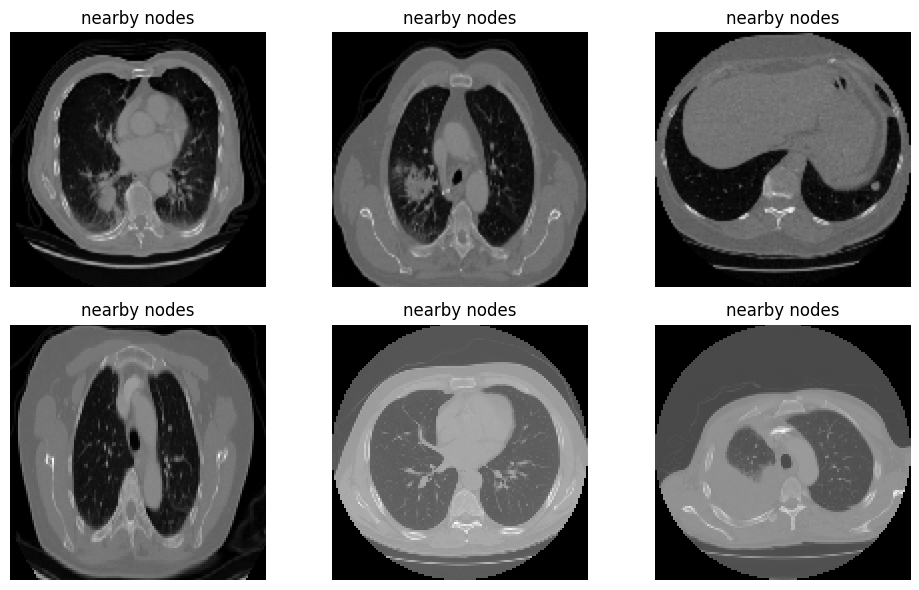

In [25]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])

    plt.title("Cancer" if labels[i]==1 else "nearby nodes")

    plt.axis("off")

plt.tight_layout()
plt.show()

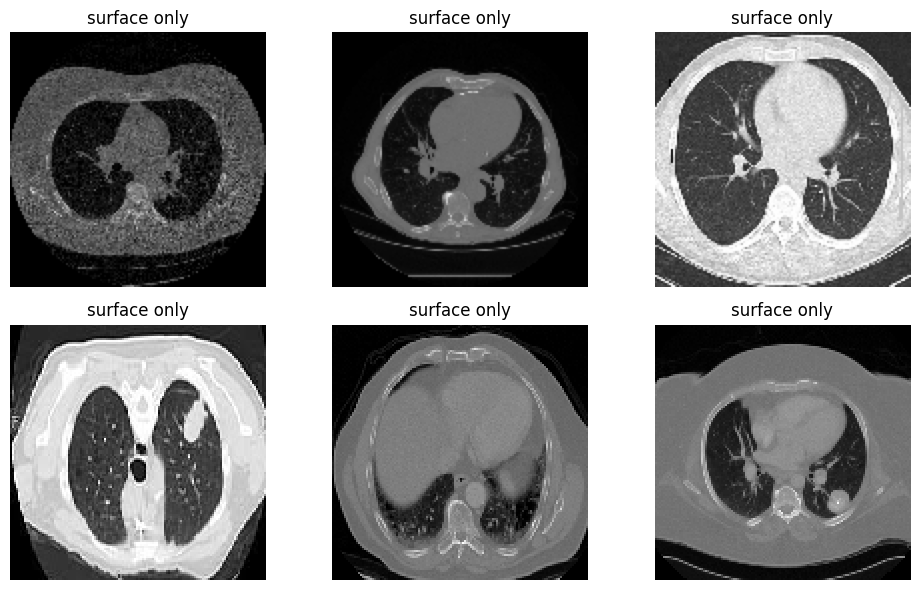

In [23]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])

    plt.title("Cancer" if labels[i]==1 else "surface only")

    plt.axis("off")

plt.tight_layout()
plt.show()

Training vs Validation Accuracy Graph (Most Important)

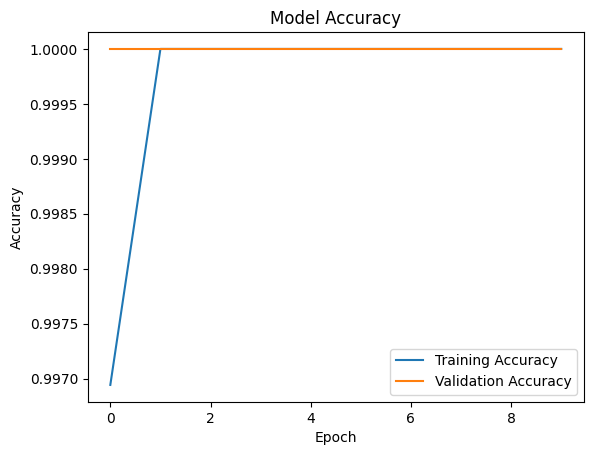

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training vs Validation Loss Graph

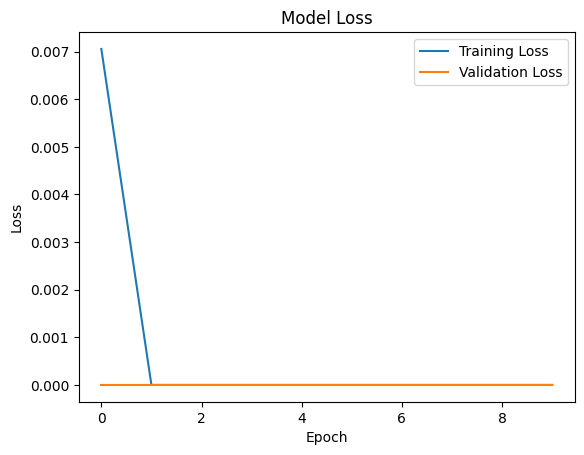

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

FIX: Define and Train rf First

23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


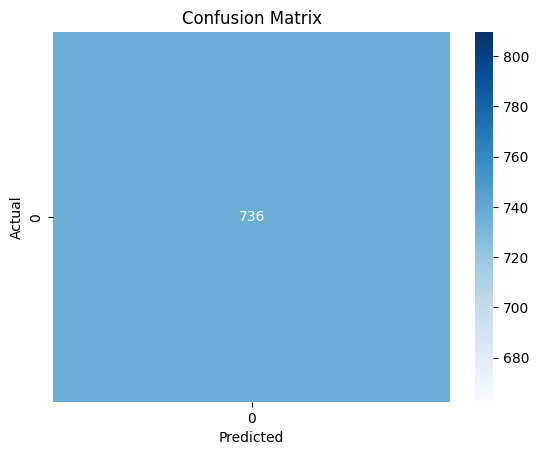

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions
y_pred = model.predict(val_data)
y_pred = np.round(y_pred)

# True labels
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



RUN THESE CELLS IN ORDER (Complete Working Flow)

Import & Load Data

In [15]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/survey lung cancer 12.csv')

Convert Categorical Columns

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

Split Features & Target

In [17]:
X = df.drop('LUNG_CANCER', axis=1)   # Change if different name
y = df['LUNG_CANCER']

Train-Test Split (THIS CREATES X_train)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature importance(Now it will work)

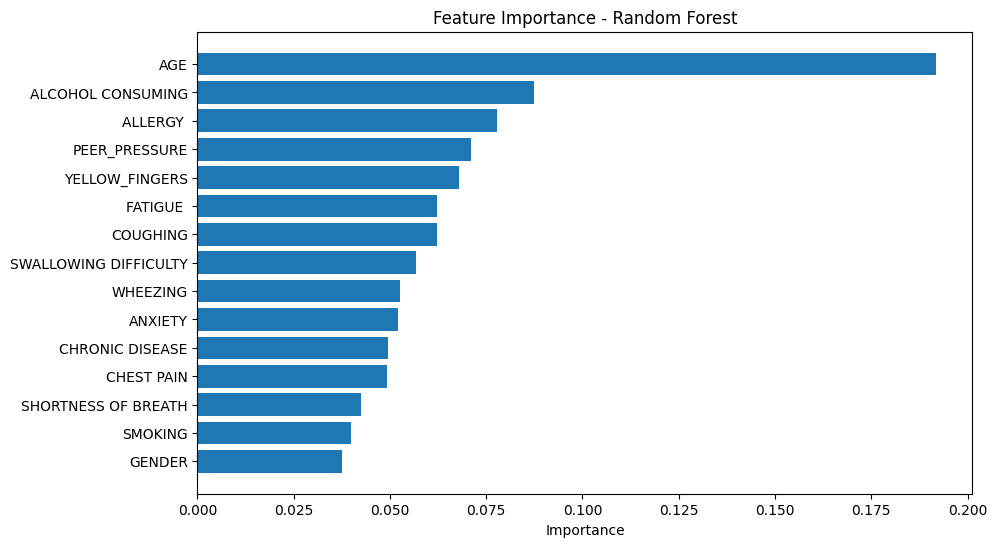

In [20]:

import matplotlib.pyplot as plt
import numpy as np

importance = rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importance)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()